# **Scaler Case Study**
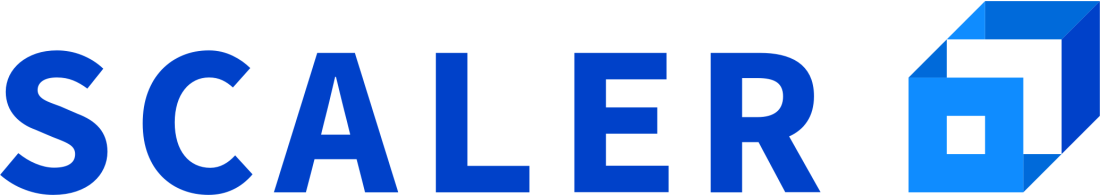

**About Scaler**: No Introduction needed ❗

**Problem Statement**:
To help profile the best companies and job positions to work for from the Scaler database on the basis of their job profile, company, and other features 



In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import datetime

In [ ]:
#Importing the data set
df = pd.read_csv('/content/scaler_clustering.csv')

In [ ]:
#first look at the dataset
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
df.shape

(205843, 7)

We have 
* 205843 rows
* 7 columns 

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,205843.0,NaN,NaN,NaN,103273.941786,59741.306484,0.0,51518.5,103151.0,154992.5,206922.0
company_hash,205799,37299,nvnv wgzohrnvzwj otqcxwto,8337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
email_hash,205843,153443,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
orgyear,205757.0,NaN,NaN,NaN,2014.88275,63.571115,0.0,2013.0,2016.0,2018.0,20165.0
ctc,205843.0,NaN,NaN,NaN,2271685.041993,11800914.440025,2.0,530000.0,950000.0,1700000.0,1000150000.0
job_position,153281,1017,Backend Engineer,43554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctc_updated_year,205843.0,NaN,NaN,NaN,2019.628231,1.325104,2015.0,2019.0,2020.0,2021.0,2021.0


**Observations**
* The mean CTC is 22 lakhs while the median CTC is 9.5 lakhs. This shows that the CTC column is right skewed.
* The max CTC is around 100 crore rupees which is essentially an outlier.
* The top job position of scaler learners is Backend Engineer.

In [ ]:
#Getting the unique values
df.nunique()

Unnamed: 0          205843
company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1017
ctc_updated_year         7
dtype: int64

**Unique values**
* There are 37299 unique companies
* There are 153443 unique emails.
* There are 1017 unique job positions

**Observations**
* Since there are more number of rows than the PII. It goes to say that there might be some learners who have either entered all their work experinece and not just the immediate work. We need to groupby the emails and see if this is true.

In [ ]:
df.groupby('email_hash').count().sort_values(by=['company_hash'],ascending=False)

,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year
email_hash,,,,,,
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,10,10,10,10,8,10
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,9,9,9,9,8,9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9,9,9,9,9,9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9,9,9,9,9,9
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065,8,8,8,8,6,8
...,...,...,...,...,...,...
f47fbe35140825c07caf830b18058e737a3c6f18c50f503c535e5efdfbe5ac50,2,0,2,2,1,2
50f183667fd8a115dda5aa345988b314e1d98a3d937ea047ad82db9148caddbc,2,0,2,2,1,2
cd281f18ef3d9042fab48860b4a7f80ec1d559c3fc2f857c266fc367b05a4e4d,1,0,1,1,0,1


In [ ]:
df[df['email_hash'] == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,24129,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
45984,46038,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,72415,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,103145,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,118076,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,121825,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,124840,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,145021,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,153402,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,160472,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


**Unique values Inference**
* As we did our groupby and selected the top recurring email, we found that the learner's have updated all their work ex and not just recent ones

**Missing Value Check**

In [ ]:
df.isna().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

**Observations**
* company_hash has 44 missing values
* orgyear has 86 missing values
* job_position has 52562 missing values

We need to convert orgyear to string before imputation

In [ ]:
df['orgyear'] = df['orgyear'].apply(lambda x : str(x))
df['ctc_updated_year'] = df['ctc_updated_year'].apply(lambda x : str(x))

In [ ]:
df['job_position'].fillna('Other',inplace=True)
df['orgyear'].fillna('2018.0',inplace=True)
df['company_hash'].fillna('nvnv wgzohrnvzwj otqcxwto',inplace=True)

* We impute the missing job position with 'Other' and not the mode of the column since the amount of missing values in this column is more than the mode.
* We impute orgyear and company_hash with mode of their respective columns since the percentage of missing values is not very high.


**Removing special characters of the data using regex**

In [ ]:
df['company_hash'] = df['company_hash'].apply(lambda x : re.sub('[^A-Za-z0-9 ]+', '', x))
df['email_hash'] = df['email_hash'].apply(lambda x : re.sub('[^A-Za-z0-9 ]+', '', x))

**Duplicates check**

Before the duplicate check we should delete the **Unnamed: 0** column

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
if df.shape[0] == df.drop_duplicates().shape[0] :
    print('No duplicates Found')
else:
    duplicates = df.shape[0] - df.drop_duplicates().shape[0]
    print('{} duplicates found'.format(duplicates))

4383 duplicates found


In [ ]:
df.drop_duplicates(inplace=True)

We found 4383 duplicate records in our dataset. We remove the same 

In [ ]:
df.dropna(inplace=True)

**Outlier Treatment**

In [ ]:
df['orgyear'] = df['orgyear'].apply(lambda x : float(x))

In [ ]:
df['orgyear'].max()

20165.0

In [ ]:
df['orgyear'].min()

0.0

**Observations of "orgyear"**
* The min year is 0
* The max year is 20165

These observations do not make sense. hence we impute the orgyear with median for orgyear greater than 99.9 percentile(2022) and less than 0.001 percentile

In [ ]:
df['orgyear'] = np.where(df['orgyear'] > 2022,2018,df['orgyear'])
df['orgyear'] = np.where(df['orgyear'] < df['orgyear'].quantile(0.001),2018,df['orgyear'])

In [ ]:
df['ctc'].min()

2

In [ ]:
df['ctc'].max()

1000150000

**Observations of "ctc"**
* The min salary is 2
* The max salary is upwards of 100 crores

The min salary for sure does not make sense. To have a fair analysis, we will impute the ctc with 95th percentile value for salary greater than 95th percentile and similarly impute with 5th percentile value for salary lesser than 5th percentile

In [ ]:
df['ctc'] = np.where(df['ctc'] > df['ctc'].quantile(0.95), df['ctc'].quantile(0.95),df['ctc'])
df['ctc'] = np.where(df['ctc'] < df['ctc'].quantile(0.05), df['ctc'].quantile(0.05),df['ctc'])

**Feature Engineering**

In [ ]:
#creating no of years of work ex
df['experience_years'] = 2022 - df['orgyear']

In [ ]:
#Checking for missing values
df.isna().sum()

company_hash         0
email_hash           0
orgyear             85
ctc                  0
job_position         0
ctc_updated_year     0
experience_years    85
dtype: int64

Imputing the experience_years column with 0 if there are missing values

In [ ]:
#Filling the missing data
df = df.fillna(0)

Created a new column called 'experience_years' which is the current year - orgyear

In [ ]:
df_company = df.groupby(['company_hash','job_position','orgyear']).agg(['mean','median','max','min']).reset_index()
df_company

company_hash        job_position orgyear        ctc  \
                                                                         mean   
0                                    0               Other  2020.0   200000.0   
1                                 0000               Other  2017.0   300000.0   
2                           01 ojztqsj    Android Engineer  2016.0   270000.0   
3                           01 ojztqsj   Frontend Engineer  2011.0   830000.0   
4       05mz exzytvrny uqxcvnt rxbxnta    Backend Engineer  2019.0  1100000.0   
...                                ...                 ...     ...        ...   
109101                              zz               Other  2013.0  1370000.0   
109102    zzb ztdnstz vacxogqj ucn rna  FullStack Engineer  2017.0   600000.0   
109103    zzb ztdnstz vacxogqj ucn rna               Other  2017.0   600000.0   
109104                          zzgato               Other  2014.0   200000.0   
109105                          zzzbzb               Other  2018.0   720000.0   

                                        experience_years                     
           median        max        min             mean median   max   min  
0        200000.0   200000.0   200000.0              2.0    2.0   2.0   2.0  
1        300000.0   300000.0   300000.0              5.0    5.0   5.0   5.0  
2        270000.0   270000.0   270000.0              6.0    6.0   6.0   6.0  
3        830000.0   830000.0   830000.0             11.0   11.0  11.0  11.0  
4       1100000.0  1100000.0  1100000.0              3.0    3.0   3.0   3.0  
...           ...        ...        ...              ...    ...   ...   ...  
109101  1370000.0  1370000.0  1370000.0              9.0    9.0   9.0   9.0  
109102   600000.0   600000.0   600000.0              5.0    5.0   5.0   5.0  
109103   600000.0   600000.0   600000.0              5.0    5.0   5.0   5.0  
109104   200000.0   200000.0   200000.0              8.0    8.0   8.0   8.0  
109105   720000.0   720000.0   720000.0              4.0    4.0   4.0   4.0  

[109106 rows x 11 columns]

In [ ]:
df_fs = df.groupby(['job_position','experience_years']).median().loc['FullStack Engineer','ctc'].to_frame()

In [ ]:
df_be = df.groupby(['job_position','experience_years']).median().loc['Backend Engineer','ctc'].to_frame()

In [ ]:
df_fe = df.groupby(['job_position','experience_years']).median().loc['Frontend Engineer','ctc'].to_frame()

In [ ]:
tdf = pd.merge(df_be,df_fe,left_on='experience_years',right_on='experience_years')

In [ ]:
tdf.rename(columns={'ctc_x':'backend','ctc_y':'frontend'},inplace=True)

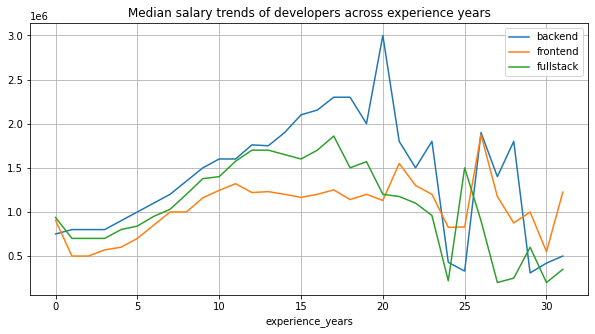

In [ ]:
#Comparision of Salary Trends of developers
pd.merge(tdf,df_fs,left_on='experience_years',right_on='experience_years').rename(columns={'ctc':'fullstack'}).plot(kind='line',figsize=(10,5))
plt.grid()
plt.title("Median salary trends of developers across experience years")
plt.show()

**Observations**
* backend enginner salary > fullstack engineer salary > frontend engineer salary
* The salary increases over time until around 20 years of experince after which it starts to decline
* Initially, all the 3 engineers with no experience are near the same bracket of salary.


In [ ]:
df_ds = df.groupby(['job_position','experience_years']).median().loc['Data Scientist','ctc'].to_frame()

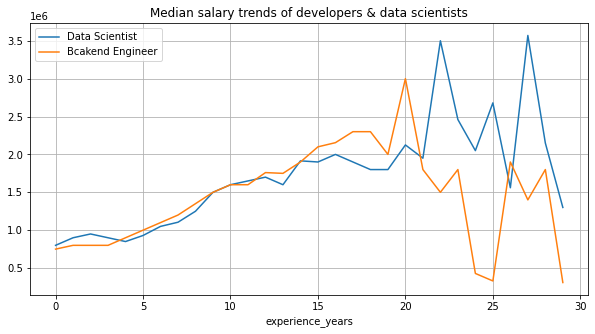

In [ ]:
#Comparision of Salary trends of developers and data scientists
pd.merge(df_ds,df_be,left_on='experience_years',right_on='experience_years').rename(columns={'ctc_x':'Data Scientist','ctc_y':"Bcakend Engineer"})[:29].plot(kind='line',figsize=(10,5))
plt.grid()
plt.title("Median salary trends of developers & data scientists")
plt.show()

**Observations**
* The salary trends of a data scientist and a backend engineer go hand in hand till about 15 years of experience.

In [ ]:
tdf_job = df.groupby("job_position").agg(['count','median'])['ctc'].reset_index()

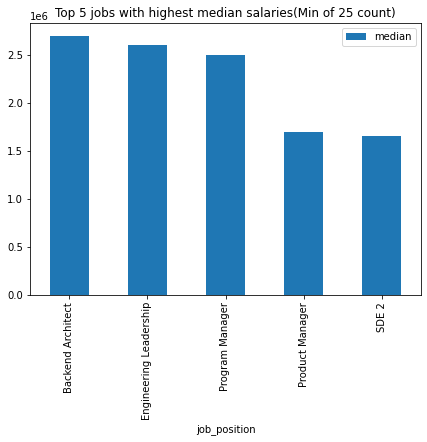

In [ ]:
tdf_job[tdf_job['count'] > 25].sort_values(by=['median'],ascending=False)[:5].drop(columns=['count']).set_index('job_position').plot(kind='bar',figsize=(7,5))
plt.title("Top 5 jobs with highest median salaries(Min of 25 count)")
plt.show()

**Observations**
* A min of 25 entries are considered for the report
* Backend Architect median salary is 27 lakhs


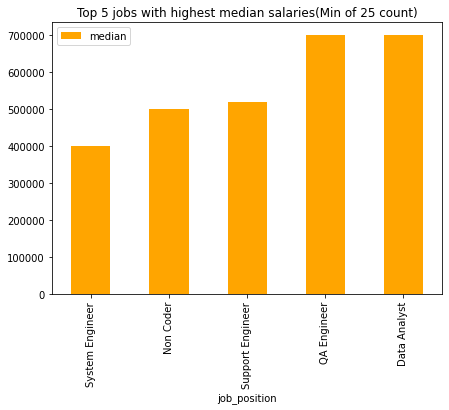

In [ ]:
tdf_job[tdf_job['count'] > 25].sort_values(by=['median'])[:5].drop(columns=['count']).set_index('job_position').plot(kind='bar',figsize=(7,5),color='orange')
plt.title("Top 5 jobs with highest median salaries(Min of 25 count)")
plt.show()

**Observations**
* System Engineer has the lowsest pay
* It is also surprising to see that data analyst is one of the lowest paying jobs

In [ ]:
#grouping to create a tier flag
tier_group = df.groupby('company_hash').mean()['ctc'].reset_index()
min_salary_com = tier_group['ctc'].min()
max_salary_com = tier_group['ctc'].max()
salary_bin = (max_salary_com - min_salary_com)//3

In [ ]:
#function for tier classifier
def company_tier_classifier(x):
  l1 = min_salary_com + salary_bin
  l2 = l1 + salary_bin
  if x <= l1:
    return(3)
  elif x <= l2:
    return(2)
  else:
    return(1)

In [ ]:
tier_group['tier'] = tier_group['ctc'].apply(lambda x: company_tier_classifier(x))

In [ ]:
df = pd.merge(df,tier_group,left_on ='company_hash',right_on ='company_hash',how='left').rename(columns={'ctc_x':"ctc", 'ctc_y':'company_average'})

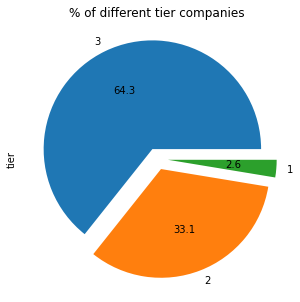

In [ ]:
df['tier'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f',explode=[0.1,0.1,0.1])
plt.grid()
plt.title("% of different tier companies")
plt.show()

**Observations**
* There are just 2.6% of the companies which are tier1

In [ ]:
#grouping to create class flags
class_group = df.groupby(['company_hash','job_position']).mean()['ctc'].reset_index()

In [ ]:
min_salary_class = class_group['ctc'].min()
max_salary_class = class_group['ctc'].max()
salary_bin_class = (max_salary_class - min_salary_class)//3

In [ ]:
#function for class classifier
def company_class_classifier(x):
  l1 = min_salary_class + salary_bin_class
  l2 = l1 + salary_bin_class
  if x <= l1:
    return(3)
  elif x <= l2:
    return(2)
  else:
    return(1)

In [ ]:
class_group['class'] = class_group['ctc'].apply(lambda x: company_class_classifier(x))

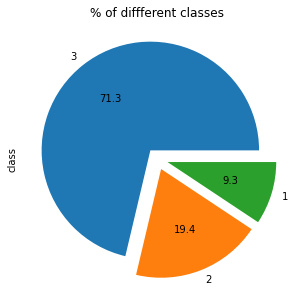

In [ ]:
class_group['class'].value_counts().plot(kind='pie',autopct='%1.1f',figsize=(5,5),explode=[0.1,0.1,0.1])
plt.title("% of diffferent classes")
plt.show()

In [ ]:
class_group['id'] = class_group['company_hash']+class_group['job_position']

In [ ]:
df['class_id'] = df['company_hash'] + df['job_position']

In [ ]:
class_group = class_group[['id','class']]

In [ ]:
df = pd.merge(df,class_group,left_on = 'class_id',right_on='id',how='left').drop(columns=['class_id','id'])

In [ ]:
#grouping for designation flag
designation_group = df.groupby(['company_hash','job_position','experience_years']).mean()['ctc'].reset_index()

In [ ]:
min_salary_desig = designation_group['ctc'].min()
max_salary_desig = designation_group['ctc'].max()
salary_bin_desig = (max_salary_desig - min_salary_desig)//3

In [ ]:
#function for designation classifier
def company_designation_classifier(x):
  l1 = min_salary_desig + salary_bin_desig
  l2 = l1 + salary_bin_desig
  if x <= l1:
    return(3)
  elif x <= l2:
    return(2)
  else:
    return(1)

In [ ]:
designation_group['designation'] = designation_group['ctc'].apply(lambda x: company_designation_classifier(x))

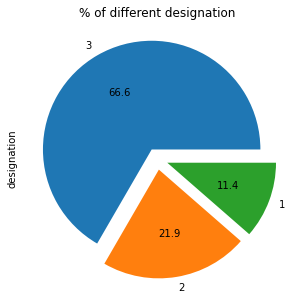

In [ ]:
designation_group['designation'].value_counts().plot(kind='pie',autopct='%1.1f',figsize=(5,5),explode=[0.1,0.1,0.1])
plt.title("% of different designation")
plt.show()

In [ ]:
designation_group['experience_years'] = designation_group['experience_years'].apply(lambda x : str(x))

In [ ]:
designation_group['id'] = designation_group['company_hash']+designation_group['job_position']+designation_group['experience_years']

In [ ]:
df['experience_years'] = df['experience_years'].apply(lambda x: str(x))

In [ ]:
df['designation_id'] = df['company_hash'] + df['job_position'] + df['experience_years']

In [ ]:
designation_group = designation_group[['id','designation']]

In [ ]:
df = pd.merge(df,designation_group,left_on='designation_id',right_on='id',how='left').drop(columns=['designation_id','id'])

In [ ]:
#Dataframe after creating tier, class and designation flags
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_years,company_average,tier,class,designation
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000.0,Other,2020.0,6.0,1.115667e+06,3,3,3
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999.0,FullStack Engineer,2019.0,4.0,1.200501e+06,3,3,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000.0,Backend Engineer,2020.0,7.0,2.000000e+06,2,2,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000.0,Backend Engineer,2019.0,5.0,1.690786e+06,2,2,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000.0,FullStack Engineer,2019.0,5.0,9.400000e+05,3,3,3


In [ ]:
ds_tier = []
for i in range(1,4,1):
  ds_tier.append(df[(df['tier'] == i) & (df['job_position'] == 'Data Scientist')]['ctc'].median())

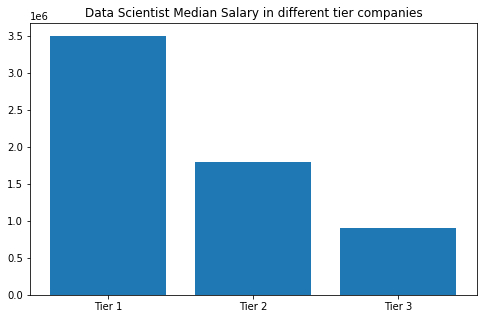

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(['Tier 1','Tier 2','Tier 3'],ds_tier)
plt.title("Data Scientist Median Salary in different tier companies")
plt.show()

**Observations**
* Tier 1 company data scientists get a median salary of 35 lakhs
* Tier 2 company data scientists get a median salary of 18 lakhs
* Tier 3 company data scientists get a median salary of 9 lakhs

##**Observation after Manual Clustering**

In [ ]:
#getting the top 5 companies with most employees 
df['company_hash'].value_counts()[:5]

nvnv wgzohrnvzwj otqcxwto    7989
xzegojo                      5064
vbvkgz                       3393
zgn vuurxwvmrt vwwghzn       3253
wgszxkvzn                    3073
Name: company_hash, dtype: int64

**nvnv wgzohrnvzwj otqcxwto** company analysis 

In [ ]:
#Getting top 5 employee's 
df[(df['tier'] == 3) &  (df['company_hash'] == 'nvnv wgzohrnvzwj otqcxwto') & (df['job_position'] == 'Data Scientist')].sort_values(by=['ctc'],ascending=False)[['email_hash','ctc']][:5]

,email_hash,ctc
113921,0bf9a65bba484fe9adaf30153b7c31f5d7fd1607118349...,3600000.0
50803,6aa8cfeb5b98da66158e0af4ca8869362174abdba84a02...,3200000.0
85545,4cfa7e643b30a89189bcca6084c9e273a9783e83ad3b81...,2900000.0
186476,45779faa0b06cbcc1b07ce2e4df30602c4aabb6bbb0d80...,2070000.0
190619,c1ef4ed5eeb40dcacbb5f7d0fc345fb77c6176024eb239...,2000000.0


In [ ]:
#Getting average salary of a data scientist at nvnv wgzohrnvzwj otqcxwto
df[(df['tier'] == 3) &  (df['company_hash'] == 'nvnv wgzohrnvzwj otqcxwto') & (df['job_position'] == 'Data Scientist')].sort_values(by=['ctc'],ascending=False)['ctc'].mean()

749111.6756756756

In [ ]:
#Getting average salary of a data scientist at nvnv wgzohrnvzwj otqcxwto
df[(df['tier'] == 3)  & (df['job_position'] == 'Data Scientist')].sort_values(by=['ctc'],ascending=False)['ctc'].mean()

1056094.777124375

**Observations**

**Company : nvnv wgzohrnvzwj otqcxwto**

* Here are the Top 5 **Data Scientists** in **nvnv wgzohrnvzwj otqcxwto** company.
* **nvnv wgzohrnvzwj otqcxwto** is a Tier 3 company
* The average salary for a data scientist at **nvnv wgzohrnvzwj otqcxwto** company is 7,49,11.
* The average salary for a data scientist at a tier 3 company is 10,56,094
* The company's salary for Data Scientists is lower than the tier's average

###**Tier 2 and Class 1**

In [ ]:
#Getting data where companies are tier 2 and class is 1
df[(df['tier'] == 2) & (df['class'] == 1)]['company_hash'].value_counts()[:5]

erxupvqn      546
vagmt         160
ofxssj        134
ovrtoegqwt    121
xzbgmx        107
Name: company_hash, dtype: int64

**erxupvqn** company analysis

In [ ]:
#Getting top 10 Data Scientists from class 1 and company "erxupvqn"
df[(df['class'] == 1) & (df['company_hash'] == 'erxupvqn')  & (df['job_position'] == 'Data Scientist')].sort_values(by=['ctc'],ascending=False)[:10][['email_hash','ctc']]

,email_hash,ctc
72380,ec77090a72db6dd8b71a313dd45fa4c45f329992b0264d...,3840000.0
145745,2db8dd24dfdf0f91042b1c5076f2c3e16211cbb6e7e162...,3840000.0
167278,a26cc532d9493ea0c191bdf771d693cfcfd8c8930e1516...,3840000.0
184157,b7b1a36da5e32bd8904fa269e875509dfe2a890b717806...,3840000.0
185201,e9a4efdf9f32e7f062e05dcae4ed32751f8eecfd4b3c9d...,3840000.0
177324,91048c7f01282884fa9c1ce8499ed4c4bdf05c87f35ab0...,3700000.0
102230,71dd396ef6049136a7321d549b117d91f4b3c2d1bc82ab...,3200000.0
117954,d6e0db35b751edf14d8fbe621481e28aab9df264796c24...,3000000.0
122105,96ab90af86726961e4d6a38a498b18fa5d5f90c8481b72...,2400000.0
70855,2fd0a51b851a76343eca7b442ab0b61533eaced0d480f3...,2000000.0


In [ ]:
#Getting median salary of Data Scientists in class 1 and from "erxupvqn" company
df[(df['class'] == 1) &   (df['company_hash'] == 'erxupvqn')  & (df['job_position'] == 'Data Scientist')].sort_values(by=['ctc'],ascending=False)['ctc'].median()

3200000.0

**Observations of Top 10 employees in Class 1 and from "erxupvqn" company**
* The outliers in the data has been imputed. Hence we may not see the actual salaries of the top data scientists belonging to class 1 & "erxupvqn" company
* The median salary of data scientists belonging to Class 1 and erxupvqn company is 32,00,000

###**Tier 2 & Class 3**

In [ ]:
#Getting data where companies are tier 2 and class is 3
df[(df['tier'] == 2) & (df['class'] == 3) & (df['job_position'] == 'Data Scientist')]['company_hash'].value_counts()[:5]

ovu                                     10
xzntr wgqugqvnxgz                        9
uytzgb utgurt                            8
uqvbvnx ntwyzgrgsxto uqxcvnt rxbxnta     7
yvqbvz wgzztwnta otqcxwto                7
Name: company_hash, dtype: int64

**ovu** analysis

In [ ]:
#Getting bottom 10 Data Scientists from class 3 and company "gqvwrt"
df[(df['class'] == 3) & (df['company_hash'] == 'ovu') & (df['job_position'] == 'Data Scientist')].sort_values(by=['ctc'])[:10][['email_hash','ctc']]

,email_hash,ctc
116554,1d5882f424594c76fce77adb127bca67bf067dee6757fa...,300000.0
21578,4a521dae8ffc9418052c0d069d2c2c9e9b4bfd1f9af046...,500000.0
37638,181cc277414c3a6a1adff7f307e9f113061bac25ff43c8...,1000000.0
88072,f3b624d2b37e0e07efc47b599bdb0ae4eb93e632a06d58...,1100000.0
91054,e35298c664a0e02b44f745eb6f8386ea7c8432dcd9058c...,1120000.0
70705,cb5b5d529049763b0468db3b34cee9f175677111ccda2c...,1300000.0
64044,26a38ebb06891966efc871036ff886898ac06d4f96f4a9...,1330000.0
32347,182c3666922db448a71af537aba493625d765d9b42f5f1...,1360000.0
142232,d6f04a7f748c7a6ec9d2e5513891a235ddd8b7c452ec3a...,2000000.0
60972,4d995705f7d44cc3c712f84ddbc32a363f4607601059d8...,2500000.0


In [ ]:
#Getting median salary of bottom 10 Data Scientists from class 3 and company "gqvwrt"
df[(df['class'] == 3) & (df['company_hash'] == 'ovu') & (df['job_position'] == 'Data Scientist')].sort_values(by=['ctc'])['ctc'].median()

1210000.0

**Observations of Bottom 10 employees in Class 3 and from "ovu" company**
* The outliers in the data has been imputed. Hence we may not see the actual salaries of the bottom data scientists belonging to class 3 & "ovu" company
* The median salary of data scientists belonging to Class 3 and ovu company is 12,10,000

###**Bottom 10 employees (earning less than most of the employees in the company)- Tier 3**

In [ ]:
df[df['tier'] == 3]['company_hash'].value_counts()[:5]

nvnv wgzohrnvzwj otqcxwto    7989
xzegojo                      5064
zgn vuurxwvmrt vwwghzn       3253
wgszxkvzn                    3073
vwwtznhqt                    2761
Name: company_hash, dtype: int64

**Bottom 10 employees earning less than most of the employees in the company : nvnv wgzohrnvzwj otqcxwto**

In [ ]:
df[df['company_hash'] == 'nvnv wgzohrnvzwj otqcxwto'].sort_values(by=['ctc'])[:10][['email_hash','job_position','ctc']]

,email_hash,job_position,ctc
135523,1ee0f94d4176e6a0ce0ffe1f863913bec65f50de96f199...,Other,200000.0
146017,9c6017b273997ab0baedca428ba26dbbfc23cf13f202d9...,Backend Engineer,200000.0
144339,4c029c8afc9c245b4300d08f2cc0ccde425aa1a620debe...,FullStack Engineer,200000.0
144175,4c029c8afc9c245b4300d08f2cc0ccde425aa1a620debe...,Frontend Engineer,200000.0
64876,1a19f11442abc311716e648395296a4d747426015279fb...,Other,200000.0
110536,a75e82c13911b8d1d2fcf7d672806d530e38330f8b59b9...,Other,200000.0
36611,0c30e699a12e43b62ba84a0d5a3c07c728d79813c2a8ab...,Other,200000.0
143404,b11f363fac1149903ebd7ec4dd48f126679247fe80eb48...,Other,200000.0
37113,916485ffb515589560f03cb525f02e5a8e8d8ea909548d...,Backend Engineer,200000.0
64850,5126587c99c1acb501decb6489350ab6f19656c3fcee2c...,Other,200000.0


* These are the bottom 10 people with the lowest pays in nvnv wgzohrnvzwj otqcxwto company which is a Tier 2 company
* It is surprising to see Backend Engineer and FullStack engineer being paid so low


Top 10 employees in **vbvkgz**- **Backend Engineer** department - having 5/6/7 years of experience earning more than their peers in Tier 2

In [ ]:
df['experience_years'] = df['experience_years'].apply(lambda x : float(x))

In [ ]:
#Getting top 10 employees in vbvkgz company at backend engineer role whose experience is greater than 5 years
df[(df['company_hash'] == 'vbvkgz') & (df['job_position'] == 'Backend Engineer') & (df['experience_years'] > 5)].sort_values(by=['ctc'],ascending=False)[['email_hash','experience_years','ctc']][:10]

,email_hash,experience_years,ctc
1491,22fbc713494ca01566a0113f1f9cc5fcb7c314ab7dac13...,6.0,3840000.0
129406,53ed9df3c63f74007324be34f5482addee598425febd42...,10.0,3840000.0
128938,d0f093cc59f3587c387a3848431cc1c5f66d04de70d84e...,9.0,3840000.0
128786,54078f50db88369acb596845b967c90a9f41b99bbdb084...,8.0,3840000.0
127610,70e7a679687ec65e8f33ca07bcca1e8d55299bbe787e51...,13.0,3840000.0
126966,7c98e196f30ef693b64f3daa89719a972cd4739834850c...,8.0,3840000.0
125333,f7394e26f69b4b2f34d707a9418f2bf481cee5d0c34253...,8.0,3840000.0
125174,97a11c7222ca2a0785e6c89a8333b9b4df1a198d273d3c...,10.0,3840000.0
123635,ab340ec6b7df06b4a200c285ca69ad0aa19e0e953687ac...,7.0,3840000.0
122236,1b5df16ffff135d3a5e8d151ec4c25eb502d600bdd660f...,7.0,3840000.0


In [ ]:
#Getting the median salary of peers in tier 2 companies as a backend engineer
df[(df['tier'] == 2) & (df['job_position'] == 'Backend Engineer')]['ctc'].median()

1800000.0

* The outliers in the data has been imputed. Hence we may not see the actual salaries 
* The median salary of peers in tier 2 companies as a backened engineer is 18,00,000

###**Top 10 companies based on thier CTC**

In [ ]:
df.groupby("company_hash").mean()['ctc'].reset_index().sort_values(by=['ctc'],ascending=False)[:10]

,company_hash,ctc
18649,pvbqhu wgrrtst ge cgwvnxgzvr nqvxzxzs,3840000.0
11064,mrht wqgoo,3840000.0
32507,xayvogen pvnvrjon ntwyzgrgsxto,3840000.0
2213,bgzgnjut ogrhnxgz,3840000.0
13544,nvnv vxs stztqvr xzohqvzwt wg rna,3840000.0
20355,rgctmgzxng,3840000.0
16076,opxrrovznv,3840000.0
32482,xatvrg,3840000.0
25205,urhqvroxsyn,3840000.0
9139,ihxwpntr ogrhnxgz,3840000.0


* These are the top 10 companies which have the highest salaries

###**Top2 positions in every company based on their CTC**

In [ ]:
tdf_2 = df.groupby(['company_hash','job_position']).mean()['ctc'].reset_index().sort_values(by=['company_hash','job_position','ctc'],ascending=False)

In [ ]:
#code to keep only top 2 job positions in each company
val = 'na'
count = 0
top_companies = []
top_jobs = []
for i in range(len(tdf_2)-1):
  com = tdf_2.loc[i,'company_hash']
  if (val != com):
    count = 0
    val = com
    count += 1
    top_companies.append(com)
    top_jobs.append(tdf_2.loc[i,'job_position'])
  elif (val == com):
    if (count < 2):
      count += 1
      top_companies.append(com)
      top_jobs.append(tdf_2.loc[i,'job_position'])
    else:
      pass

In [ ]:
tdf_top2 = {'companies':top_companies, 'top 2 jobs': top_jobs}
pd.DataFrame(tdf_top2)

,companies,top 2 jobs
0,0,Other
1,0000,Other
2,01 ojztqsj,Android Engineer
3,01 ojztqsj,Frontend Engineer
4,05mz exzytvrny uqxcvnt rxbxnta,Backend Engineer
...,...,...
49556,zyvzwt wgzohrnxzs tzsxzttqo,Frontend Engineer
49557,zz,Other
49558,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer
49559,zzb ztdnstz vacxogqj ucn rna,Other


**The above dataframe contains the top 2 job positions based on thier ctc across all companies**

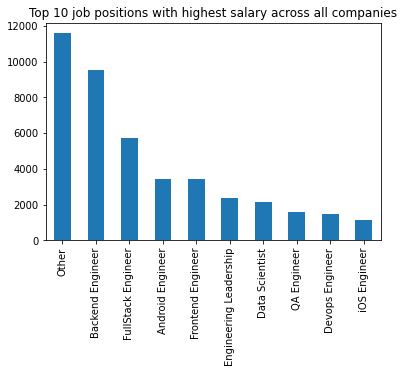

In [ ]:
pd.Series(top_jobs).value_counts()[:10].plot(kind='bar')
plt.title("Top 10 job positions with highest salary across all companies")
plt.show()

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


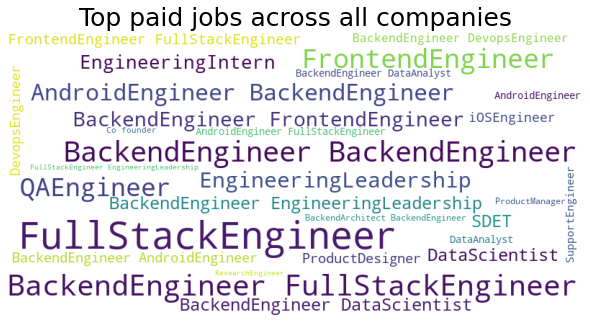

In [ ]:
#Wordcloud visualization
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words = ''
for i in top_jobs:
  x = i
  x = x.split()
  y = ''.join(x)
  comment_words+= y
  comment_words+=' '
wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Top paid jobs across all companies",fontsize=25,color='black')
plt.show()

**Observations**

Considering we omit "Others" since it does not give much information about the type of the job, Here are the top 6 highest paying jobs across all companies

1. Backend Engineer
2. Fullstack Engineer
3. Android Engineer
4. Frontend Engineer
5. Engineering Leadership
6. Data Scientist


#K means

**Data Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = df[[ 'ctc', 'experience_years', 'company_average', 'tier',
       'class', 'designation']]

In [ ]:
#Fitting and transforming the data
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,-0.174614,-0.215021,-0.235152,0.713275,0.667632,0.645853
1,-0.838466,-0.693572,-0.106701,0.713275,0.667632,0.645853
2,0.744563,0.024254,1.103847,-1.149042,-1.010360,-0.899053
3,-0.583138,-0.454297,0.635655,-1.149042,-1.010360,0.645853
4,0.131778,-0.454297,-0.501135,0.713275,0.667632,0.645853
...,...,...,...,...,...,...
201455,-1.073366,1.699183,0.652546,-1.149042,-1.010360,0.645853
201456,-0.787400,-0.454297,0.246219,-1.149042,0.667632,0.645853
201457,-0.583138,-1.411399,0.200245,0.713275,0.667632,0.645853
201458,2.623771,-0.932848,-0.136449,0.713275,0.667632,0.645853


In [ ]:
from sklearn.cluster import KMeans
k=3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [ ]:
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 0.25008567,  0.02790123,  0.77757427, -1.01717471, -0.7046618 ,
        -0.39723989],
       [-0.49184998, -0.20327022, -0.62690703,  0.70402348,  0.63982422,
         0.55777144],
       [ 2.01427393,  1.00472401,  1.51982531, -1.37812094, -1.75419037,
        -2.02479485]])

In [ ]:
#Visualize clusters
clusters = pd.DataFrame(X,columns=[ 'ctc', 'experience_years', 'company_average', 'tier',
       'class', 'designation'])
clusters['label'] = kmeans.labels_
clusters 

,ctc,experience_years,company_average,tier,class,designation,label
0,-0.174614,-0.215021,-0.235152,0.713275,0.667632,0.645853,1
1,-0.838466,-0.693572,-0.106701,0.713275,0.667632,0.645853,1
2,0.744563,0.024254,1.103847,-1.149042,-1.010360,-0.899053,0
3,-0.583138,-0.454297,0.635655,-1.149042,-1.010360,0.645853,0
4,0.131778,-0.454297,-0.501135,0.713275,0.667632,0.645853,1
...,...,...,...,...,...,...,...
201455,-1.073366,1.699183,0.652546,-1.149042,-1.010360,0.645853,0
201456,-0.787400,-0.454297,0.246219,-1.149042,0.667632,0.645853,1
201457,-0.583138,-1.411399,0.200245,0.713275,0.667632,0.645853,1
201458,2.623771,-0.932848,-0.136449,0.713275,0.667632,0.645853,1


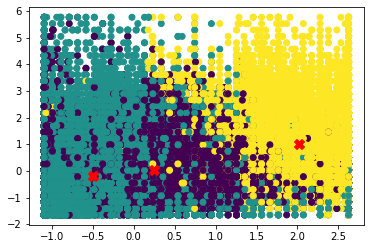

In [ ]:
#Function to visualize the clusters
def viz_clusters(kmeans):
  plt.scatter(clusters['ctc'],clusters['experience_years'],c=clusters['label'])
  plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='red',marker = 'X',s=100)

viz_clusters(kmeans)

**Polar Plots for interpretation**

In [ ]:
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar,id_vars=['label'])
polar

,label,variable,value
0,0,ctc,0.252094
1,1,ctc,-0.492019
2,2,ctc,2.016828
3,0,experience_years,0.029465
4,1,experience_years,-0.203350
5,2,experience_years,1.004837
6,0,company_average,0.778189
7,1,company_average,-0.626696
8,2,company_average,1.521101
9,0,tier,-1.016878


In [ ]:
import plotly.express as px
fig = px.line_polar(polar,r='value',theta='variable',color='label',line_close=True,height=700,width=800)
fig.show()

**Observations**

* label 2 employee's have the highest ctc, highest experience and lowest tier, class and designation rating
* label 1 employee's have the lowest ctc, lowest experience and highest tier,class and designation rating 
* label 0 is in the middle ground

###**Finding the best k**

In [ ]:
#Inertia = Within cluster sum of sqaure
kmeans_per_k = [KMeans(n_clusters=k, random_state = 46).fit(X) for k in range(1,10)]

inertias = [model.inertia_ for model in kmeans_per_k]

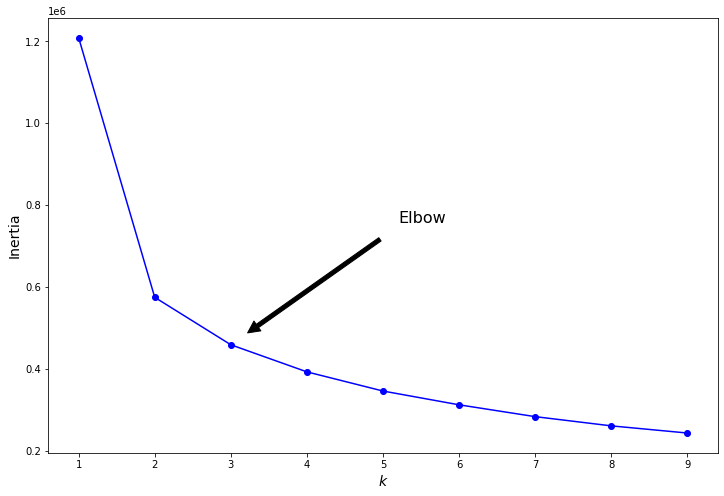

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,10),inertias, "bo-" )
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.annotate('Elbow', xy = (3, inertias[2]), xytext=(0.55,0.55),textcoords = 'figure fraction',fontsize=16,arrowprops=dict(facecolor='black',shrink=0.1))
plt.show()

**Observation**

* With the elbow method, we saw a steep decline at k=2 and further on the decline slowed down which signifies ideal k should be 2.

* However taking into consideration the domain perspective, it would be wise to have 3 clusters since we can group individuals into 
1. Over achievers
2. Mediocre 
3. Under achievers


#**Hierarchial Clustering**

In [ ]:
X = df[[ 'ctc', 'experience_years', 'company_average', 'tier',
       'class', 'designation']]

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
#new df for hierarchial clustering
scaled_df = pd.DataFrame(X, columns= [ 'ctc', 'experience_years', 'company_average', 'tier',
       'class', 'designation'], index=df.index)

In [ ]:
# Taking a sample of the dataset to speed up the time
scaled_df = scaled_df.sample(n=30000)

In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
# Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(scaled_df, method='ward') #linkage = ward

In [ ]:
#looking at the shape of the total clusters
Z.shape

(29999, 4)

Text(0, 0.5, 'distance')

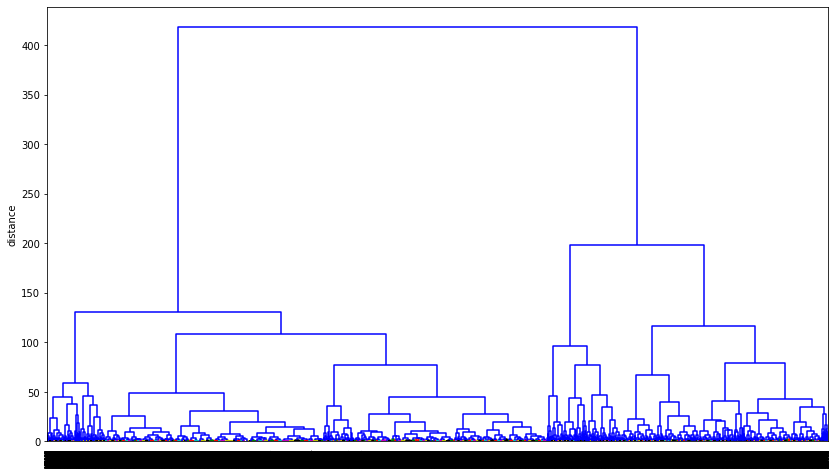

In [ ]:
#Visualizing the clusters
fig, ax = plt.subplots(figsize=(14, 8))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

**Observations**
* Hierarchial clustering becomes very complex to visualize when there is a lot of data points.

**Method 2 for hierarchial clustering**

In [ ]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering
# create clusters
hc_2020 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_pred = hc_2020.fit_predict(scaled_df)

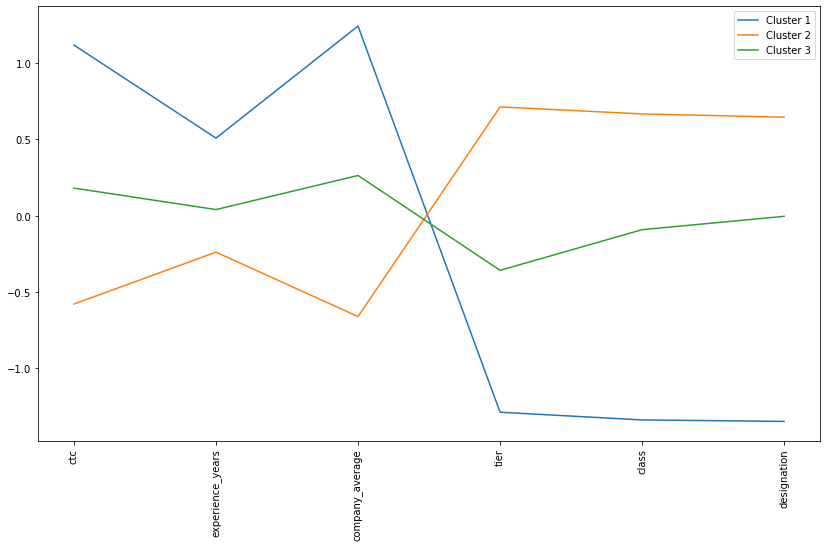

In [ ]:
#Plot a line graph to see the characteristics of the clusters
scaled_df['label'] = pd.Series(y_pred, index=scaled_df.index)

clustered_df = scaled_df.groupby('label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

plt.figure(figsize=(14,8))
plt.plot(clustered_df.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)

**Observations**
* This is a much simpler way to visualize the hierarchial clustering results
* We have 3 cluster : cluster 1, 2 & 3
* The results are similar to K means clustering.

**Insights from Unsupervised Clustering**

* Both K means and Hierarchial clustering in this case gave similar clusters
* Cluster 1 from hierarchial clusters and label 2 from k means are similar clusters in which employee's typically have high ctc, high experience and low tier, class and designation ratings. This group of clusters are typically the high achievers. They are the creamy layer. It is very likely that these group of people are working in FAANG/MAANG(Tier 1) companies
* Cluster 2 from hierarchial clusters and label 1 from the k means are similar clusters in which employee's typically have low ctc, low experience and high tier, class and designation ratings. These are the group of people typically working for Tier 3 companies.
* Cluster 3 from hierarchial clusters and label 0 from the k means are similar clusters wherein they are the pool of employee's between the two extreme's

###**Business Insights & Recommendations**

**Business Insights**
* Backend enginner salary > Fullstack engineer salary > Frontend engineer salary
* The salary trends of a data scientist and a backend engineer go hand in hand till about 15 years of experience.
* **"pvbqhu wgrrtst ge cgwvnxgzvr nqvxzxzs"**	company has the highest average CTC across all companies
* Backend Engineer, Fullstack Engineer, Android Engineer are the highest paid professions across most of the companies 

**Recommendations**
* Scaler can use the designation flags and make comparisions across employee's working in different companies and different domains with different experience. With this  handbook, the leads team can pitch to a potential candidate who falls in the designation pool of 3 to upskill himself so that he can fall into the designation pool of 2 or 1 whose salaries will be significantly higher.

* Good leadership is the key to success in business and in any field. 
Scaler should start a new vertical for “Engineering Leadership” as a micro course where practical leadership skills can be taught. This course will eventually help student’s get good packages since it is one of the top 10 highest paying jobs in India.